## TP 1 - Análisis de datos - Trabajo práctico integrador
#### Objetivo General: Realizar un trabajo de análisis exploratorio de datos (EDA)

---
#### Dataset: Denuncias a la policía de NY
---

## Integrantes
- Juan Pablo Gonzales
- Juan Chunga
- Rodrigo Nicolás Lauro

### Requerimientos

In [6]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import missingno as msno

### 2. Consignas
El análisis debe abordar los siguientes aspectos:

- Exploración y comprensión de los datos:

    - Cargar el dataset proporcionado y realizar un análisis exploratorio de los datos.
    - Describir las características principales del dataset, incluyendo el número de observaciones, número de variables y tipos de datos.
    - Identificar patrones generales y distribuciones.
    - Identificar errores, outliers (anomalías), valores faltantes y su tipo (MCAR, MAR, MNAR).

### DESCARGAR datos desde API

In [3]:

# URL base
base_url = "https://data.cityofnewyork.us/resource/5uac-w243.json"

# Configuración
limit = 50000  
offset = 0
data = []
done = False

while not done:
    # Construimos la URL con los parámetros     
    #url = f"{base_url}?$where=cmplnt_fr_dt >= '2025-01-01T00:00:00.000' AND cmplnt_fr_dt < '2025-12-01T00:00:00.000'&$limit={limit}&$offset={offset}"
    url = f"{base_url}?$limit={limit}&$offset={offset}"

 
    print(f"Descargando: {url}")
    
    # Realizamos la petición
    response = requests.get(url)
    
    if response.status_code != 200:
        print("Error en la descarga:", response.status_code)
        break
    
    batch = response.json()
    
    # Si ya no hay más datos, cortamos
    if not batch:
        done = True
        print("Finalizado.")
    else:
        data.extend(batch)
        offset += limit  # Avanzamos al siguiente bloque
        time.sleep(0.5)  # Pequeña pausa para evitar ser bloqueado

# Convertimos a DataFrame
df = pd.DataFrame(data)
#df.to_csv("denuncias_nyc_2025.csv", index=False)
df.to_csv("denuncias_nyc_full.csv", index=False)
 

Descargando: https://data.cityofnewyork.us/resource/5uac-w243.json?$limit=50000&$offset=0
Descargando: https://data.cityofnewyork.us/resource/5uac-w243.json?$limit=50000&$offset=50000
Descargando: https://data.cityofnewyork.us/resource/5uac-w243.json?$limit=50000&$offset=100000
Descargando: https://data.cityofnewyork.us/resource/5uac-w243.json?$limit=50000&$offset=150000
Descargando: https://data.cityofnewyork.us/resource/5uac-w243.json?$limit=50000&$offset=200000
Descargando: https://data.cityofnewyork.us/resource/5uac-w243.json?$limit=50000&$offset=250000
Descargando: https://data.cityofnewyork.us/resource/5uac-w243.json?$limit=50000&$offset=300000
Finalizado.


In [4]:
#Levantamos el Dataset completo para su anilisis (previamente descargado) 
df = pd.read_csv("denuncias_nyc_full.csv", low_memory=False)

In [5]:
print("\n=== DISTRIBUCIÓN POR AÑO DEL DATASET COMPLETO ===")
df['cmplnt_fr_dt'] = pd.to_datetime(df['cmplnt_fr_dt'], errors='coerce')
df['año'] = df['cmplnt_fr_dt'].dt.year
mes_dist = df['año'].value_counts().sort_index()
print(mes_dist)


=== DISTRIBUCIÓN POR AÑO DEL DATASET COMPLETO ===
año
1925.0         1
1963.0         1
1970.0         1
1975.0         6
1979.0         1
1980.0         2
1983.0         1
1984.0         1
1987.0         1
1988.0         2
1989.0         2
1991.0         2
1993.0         1
1994.0         1
1995.0         2
1996.0         2
1997.0         3
1999.0         2
2000.0         4
2001.0         5
2002.0         9
2003.0         3
2004.0         3
2005.0        23
2006.0         6
2007.0         4
2008.0        13
2009.0         4
2010.0         8
2011.0         8
2012.0         6
2013.0        21
2014.0        24
2015.0        56
2016.0        34
2017.0        45
2018.0        46
2019.0        67
2020.0       108
2021.0       146
2022.0       275
2023.0       649
2024.0      7709
2025.0    278727
Name: count, dtype: int64


### DISTRIBUCIÓN POR AÑO DEL DATASET COMPLETO

Al observar la distribución de registros por año, notamos que el dataset continúa creciendo semana a semana, reflejando una actualización continua de datos.

Sin embargo, la mayor concentración de delitos computados corresponde al año **2025**. Esta diferencia no necesariamente representa un aumento real en la criminalidad, sino que parece estar relacionada con una mayor cantidad de datos disponibles para ese año, en comparación con años anteriores.

Por esta razón, tomamos la decisión de **focalizar nuestro análisis exclusivamente en el año 2025**, para evitar sesgos derivados de una distribución desigual de registros entre años.


In [7]:
#Levantamos el Dataset completo para su anilisis (previamente descargado) 
df = pd.read_csv("denuncias_nyc_2025.csv", low_memory=False)

# Número de filas y columnas del dataset
print("Numero de Filas:", df.shape[0])
print("Numero de Columnas:", df.shape[1])

# Nombres y tipos de datos
print("\nTipos de datos:")
print(df.dtypes)



Numero de Filas: 278727
Numero de Columnas: 36

Tipos de datos:
cmplnt_num            object
addr_pct_cd            int64
boro_nm               object
cmplnt_fr_dt          object
cmplnt_fr_tm          object
cmplnt_to_dt          object
cmplnt_to_tm          object
crm_atpt_cptd_cd      object
hadevelopt            object
jurisdiction_code      int64
juris_desc            object
ky_cd                  int64
law_cat_cd            object
loc_of_occur_desc     object
ofns_desc             object
parks_nm              object
patrol_boro           object
pd_cd                float64
pd_desc               object
prem_typ_desc         object
rpt_dt                object
station_name          object
susp_age_group        object
susp_race             object
susp_sex              object
vic_age_group         object
vic_race              object
vic_sex               object
x_coord_cd             int64
y_coord_cd             int64
latitude             float64
longitude            float64
lat_lon 

### Conversión de tipos de datos

Observamos que, al cargar el dataset, todos los campos fueron interpretados como tipo `object`, es decir, texto plano.  
Para realizar un análisis más preciso, procedemos a:

- Convertir los campos que representan **fechas**, **coordenadas** y **códigos** a sus respectivos tipos (`datetime`, `float`, `int`).
- Desestimar las columnas que no son relevantes para nuestro análisis actual o que contienen información redundante.


In [8]:
# Seleccionamos solo las columnas que nos interesan
df_limpio = df[['addr_pct_cd','boro_nm', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt', 'cmplnt_to_tm', 'crm_atpt_cptd_cd',
                'hadevelopt', 'jurisdiction_code', 'juris_desc', 'ky_cd', 'law_cat_cd', 'loc_of_occur_desc', 'ofns_desc' , 
                'patrol_boro' , 'pd_cd' ,'pd_desc', 'prem_typ_desc' ,'rpt_dt', 'susp_age_group', 'susp_race', 'susp_sex',
                'vic_age_group', 'vic_race', 'vic_sex','latitude', 'longitude'                
               ]].copy()

# Convertimos los tipos de datos
df_limpio['cmplnt_fr_dt'] = pd.to_datetime(df_limpio['cmplnt_fr_dt'], errors='coerce') 
df_limpio['cmplnt_to_dt'] = pd.to_datetime(df_limpio['cmplnt_to_dt'], errors='coerce') 
df_limpio['rpt_dt'] = pd.to_datetime(df_limpio['rpt_dt'], errors='coerce') 

# Crear columna año-mes
df_limpio['anio_mes'] = df_limpio['rpt_dt'].dt.to_period('M')



#df_limpio['cmplnt_to_tm'] = pd.to_datetime(df_limpio['cmplnt_to_tm'], format='%H:%M:%S', errors='coerce').dt.time
#df_limpio['cmplnt_fr_tm'] = pd.to_datetime(df_limpio['cmplnt_fr_tm'], format='%H:%M:%S', errors='coerce').dt.time

df_limpio['cmplnt_to_tm'] = df_limpio['cmplnt_to_tm'].astype('string')
df_limpio['cmplnt_fr_tm'] = df_limpio['cmplnt_fr_tm'].astype('string')



 
df_limpio['jurisdiction_code'] = pd.to_numeric(df_limpio['jurisdiction_code'], errors='coerce')
df_limpio['pd_cd'] = pd.to_numeric(df_limpio['pd_cd'], errors='coerce')

df_limpio['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df_limpio['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

df_limpio['addr_pct_cd'] = df_limpio['addr_pct_cd'].astype('string')
df_limpio['boro_nm'] = df_limpio['boro_nm'].astype('string') 
df_limpio['crm_atpt_cptd_cd'] = df_limpio['crm_atpt_cptd_cd'].astype('string')
df_limpio['hadevelopt'] = df_limpio['hadevelopt'].astype('string')
df_limpio['juris_desc'] = df_limpio['juris_desc'].astype('string')
df_limpio['ky_cd'] = df_limpio['ky_cd'].astype('string')
df_limpio['law_cat_cd'] = df_limpio['law_cat_cd'].astype('string')
df_limpio['loc_of_occur_desc'] = df_limpio['loc_of_occur_desc'].astype('string')
df_limpio['ofns_desc'] = df_limpio['ofns_desc'].astype('string')
df_limpio['patrol_boro'] = df_limpio['patrol_boro'].astype('string')
df_limpio['pd_desc'] = df_limpio['pd_desc'].astype('string')
df_limpio['prem_typ_desc'] = df_limpio['prem_typ_desc'].astype('string')
df_limpio['susp_age_group'] = df_limpio['susp_age_group'].astype('string')
df_limpio['susp_race'] = df_limpio['susp_race'].astype('string')
df_limpio['susp_sex'] = df_limpio['susp_sex'].astype('string')
df_limpio['vic_age_group'] = df_limpio['vic_age_group'].astype('string')
df_limpio['vic_race'] = df_limpio['vic_race'].astype('string')
df_limpio['vic_sex'] = df_limpio['vic_sex'].astype('string')


# Renombramos 
df_limpio = df_limpio.rename(columns={
    'addr_pct_cd' : 'distrito',
    'boro_nm' : 'barrio',
    'cmplnt_fr_dt' : 'fecha_desde',
    'cmplnt_fr_tm' : 'hora_desde',
    
    'cmplnt_to_dt' : 'fecha_hasta',
    'cmplnt_to_tm' : 'hora_hasta',
    
    'rpt_dt' :'fecha_reporte',
    'crm_atpt_cptd_cd' : 'atentado_completado',
    'hadevelopt': 'vivienda_publica',
    'jurisdiction_code' : 'juridisccion_cod',
    'juris_desc' : 'juridisccion_desc',
    'ky_cd' : 'ofensa_clasif_cod',   
    'law_cat_cd' : 'ofensa_nivel', 
    'loc_of_occur_desc' : 'ofensa_lugar',
    'ofns_desc' : 'ofensa_desc',
    'patrol_boro'  : 'barrio_zona',
    'pd_cd' : 'ofensa_clasif_cod_mas_det',
    'pd_desc' : 'ofensa_desc_mas_det',
    'prem_typ_desc' : 'lugar_desc',
    'susp_age_group' : 'sospechoso_edad_grupo', 
    'susp_race' : 'sospechoso_raza', 
    'susp_sex' : 'sospechoso_sexo',
    'vic_age_group' : 'victima_edad_grupo',
    'vic_race' : 'victima_raza',
    'vic_sex' : 'victima_sexo'
    
})

# Mostramos
df_limpio.head()

print(df_limpio.dtypes)


# campos afuera
#HOUSING_PSA	Development Level Code . Codigo de desarrollo de vivienda
#PARKS_NM   Parque o lugar publico
#STATION_NAME  Parada de estacion, sospecho colectivo o tren
#TRANSIT_DISTRICT  distrito de transito
#X_COORD_CD coord plano ny  -- tenemos lat y long
#Y_COORD_CD coord plano ny  -- tenemos lat y long



distrito                     string[python]
barrio                       string[python]
fecha_desde                  datetime64[ns]
hora_desde                   string[python]
fecha_hasta                  datetime64[ns]
hora_hasta                   string[python]
atentado_completado          string[python]
vivienda_publica             string[python]
juridisccion_cod                      int64
juridisccion_desc            string[python]
ofensa_clasif_cod            string[python]
ofensa_nivel                 string[python]
ofensa_lugar                 string[python]
ofensa_desc                  string[python]
barrio_zona                  string[python]
ofensa_clasif_cod_mas_det           float64
ofensa_desc_mas_det          string[python]
lugar_desc                   string[python]
fecha_reporte                datetime64[ns]
sospechoso_edad_grupo        string[python]
sospechoso_raza              string[python]
sospechoso_sexo              string[python]
victima_edad_grupo           str

### Información general del dataset

El dataset contiene **278.727 registros desde 2025**  de denuncias policiales de la ciudad de Nueva York con **27 variables** relevantes después de la limpieza. Los datos incluyen información sobre:

- **Temporal**: Fechas y horas del incidente
- **Geográfica**: Barrios, distritos, coordenadas
- **Delitos**: Tipos, niveles y descripciones de ofensas
- **Personas**: Información demográfica de víctimas y sospechosos
- **Contexto**: Lugar del hecho, jurisdicción, etc.


In [9]:
# Estadísticas descriptivas básicas
print("=== ESTADÍSTICAS BÁSICAS DEL DATASET ===")
print(f"Número total de registros: {len(df_limpio):,}")
print(f"Número de variables: {len(df_limpio.columns)}")
print(f"Período de datos: {df_limpio['fecha_desde'].min()} a {df_limpio['fecha_desde'].max()}")

print("\n=== INFORMACIÓN DE MEMORIA ===")
print(f"Tamaño en memoria: {df_limpio.memory_usage().sum() / 1024:.2f} KB")

print("\n=== RESUMEN DE TIPOS DE DATOS ===")
print(df_limpio.dtypes.value_counts())

# Estadísticas básicas de las variables numéricas
print("\n=== ESTADÍSTICAS DE VARIABLES NUMÉRICAS ===")
df_limpio.describe()


=== ESTADÍSTICAS BÁSICAS DEL DATASET ===
Número total de registros: 278,727
Número de variables: 28
Período de datos: 2025-01-01 00:00:00 a 2025-06-30 00:00:00

=== INFORMACIÓN DE MEMORIA ===
Tamaño en memoria: 60971.66 KB

=== RESUMEN DE TIPOS DE DATOS ===
string[python]    20
datetime64[ns]     3
float64            3
int64              1
period[M]          1
Name: count, dtype: int64

=== ESTADÍSTICAS DE VARIABLES NUMÉRICAS ===


,fecha_desde,fecha_hasta,juridisccion_cod,ofensa_clasif_cod_mas_det,fecha_reporte,latitude,longitude
count,278727,265950,278727.000000,278591.000000,278727,278727.000000,278727.000000
mean,2025-04-01 17:10:01.788847104,2025-04-02 14:59:43.837563392,0.485597,433.050285,2025-04-03 21:01:45.664682496,40.514255,-73.516977
min,2025-01-01 00:00:00,2025-01-01 00:00:00,0.000000,100.000000,2025-01-01 00:00:00,0.000000,-74.254378
25%,2025-02-17 00:00:00,2025-02-18 00:00:00,0.000000,259.000000,2025-02-19 00:00:00,40.674418,-73.973457
50%,2025-04-02 00:00:00,2025-04-04 00:00:00,0.000000,398.000000,2025-04-05 00:00:00,40.735031,-73.923737
75%,2025-05-16 00:00:00,2025-05-17 00:00:00,0.000000,638.000000,2025-05-18 00:00:00,40.814611,-73.876959
max,2025-06-30 00:00:00,2025-07-05 00:00:00,97.000000,922.000000,2025-06-30 00:00:00,40.912722,0.000000
std,NaN,NaN,4.292937,236.466417,NaN,3.011095,5.462396


### Análisis de Valores Faltantes

Un aspecto crucial del análisis exploratorio es identificar y entender los patrones de datos faltantes:


In [10]:
# Análisis de valores faltantes
print("=== ANÁLISIS DE VALORES FALTANTES ===")

# Conteo de valores faltantes por columna
missing_values = df_limpio.isnull().sum()
missing_percentage = (missing_values / len(df_limpio)) * 100

# Crear un DataFrame con la información de valores faltantes
missing_info = pd.DataFrame({
    'Columna': missing_values.index,
    'Valores_Faltantes': missing_values.values,
    'Porcentaje_Faltante': missing_percentage.values
}).sort_values('Porcentaje_Faltante', ascending=False)

# Mostrar solo las columnas con valores faltantes
missing_info_filtered = missing_info[missing_info['Valores_Faltantes'] > 0]
print(f"Columnas con valores faltantes: {len(missing_info_filtered)} de {len(df_limpio.columns)}")
print("\nDetalle de valores faltantes:")
print(missing_info_filtered.to_string(index=False))

# Análisis de patrones específicos
print(f"\n=== PATRONES DE VALORES FALTANTES ===")
print(f"Registros completamente completos: {df_limpio.dropna().shape[0]} ({(df_limpio.dropna().shape[0]/len(df_limpio)*100):.1f}%)")
print(f"Registros con al menos un valor faltante: {df_limpio.isnull().any(axis=1).sum()} ({(df_limpio.isnull().any(axis=1).sum()/len(df_limpio)*100):.1f}%)")


=== ANÁLISIS DE VALORES FALTANTES ===
Columnas con valores faltantes: 2 de 28

Detalle de valores faltantes:
                  Columna  Valores_Faltantes  Porcentaje_Faltante
              fecha_hasta              12777             4.584055
ofensa_clasif_cod_mas_det                136             0.048793

=== PATRONES DE VALORES FALTANTES ===
Registros completamente completos: 265950 (95.4%)
Registros con al menos un valor faltante: 12777 (4.6%)


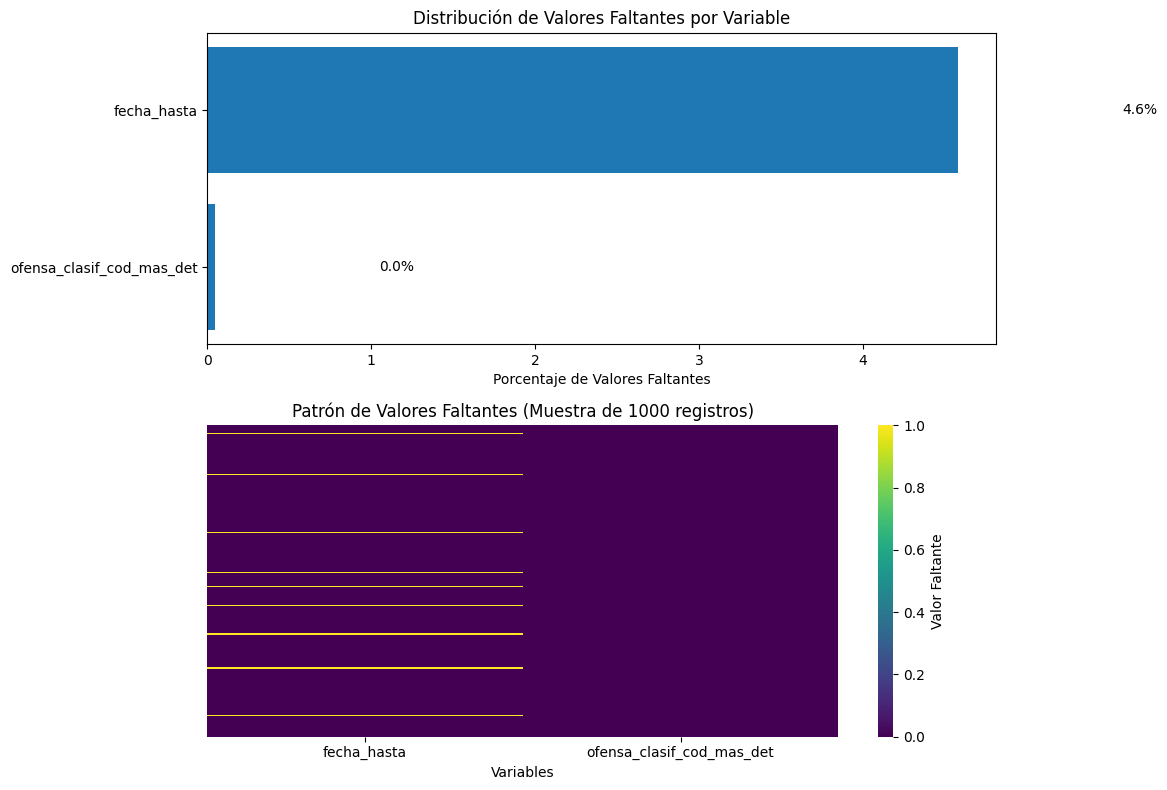

In [11]:
# Gráfico de valores faltantes
plt.figure(figsize=(12, 8))

if len(missing_info_filtered) > 0:
    plt.subplot(2, 1, 1)
    plt.barh(missing_info_filtered['Columna'], missing_info_filtered['Porcentaje_Faltante'])
    plt.xlabel('Porcentaje de Valores Faltantes')
    plt.title('Distribución de Valores Faltantes por Variable')
    plt.gca().invert_yaxis()
    
    # Añadir etiquetas con los valores
    for i, v in enumerate(missing_info_filtered['Porcentaje_Faltante']):
        plt.text(v + 1, i, f'{v:.1f}%', va='center')
    
    plt.subplot(2, 1, 2)
    # Mapa de calor de valores faltantes para las primeras columnas con faltantes
    cols_with_missing = missing_info_filtered['Columna'].head(10).tolist()
    sns.heatmap(df_limpio[cols_with_missing].isnull(), 
                cbar=True, yticklabels=False, 
                cmap='viridis', cbar_kws={'label': 'Valor Faltante'})
    plt.title('Patrón de Valores Faltantes (Muestra de 1000 registros)')
    plt.xlabel('Variables')
else:
    plt.text(0.5, 0.5, 'No hay valores faltantes en el dataset', 
             ha='center', va='center', fontsize=16)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title('Estado de Completitud del Dataset')

plt.tight_layout()
plt.show()


### Análisis de Variables Categóricas Principales

Exploramos las distribuciones de las variables categóricas más importantes:


In [12]:
# Análisis de variables categóricas principales
# Paso 2: Agrupar por año-mes y nivel de ofensa
delitos_por_mes_nivel = df_limpio.groupby(['fecha_desde', 'ofensa_nivel']).size().unstack(fill_value=0)
 
print("=== DISTRIBUCIÓN POR AÑO MES ===")
anio_mes = df_limpio['fecha_desde'].value_counts()
print(anio_mes)
print(f"\nTotal por año mes: {df_limpio['fecha_desde'].nunique()}")


print("=== DISTRIBUCIÓN POR BARRIOS ===")
barrios_dist = df_limpio['barrio'].value_counts()
print(barrios_dist)
print(f"\nTotal de barrios únicos: {df_limpio['barrio'].nunique()}")

print("\n=== NIVELES DE DELITOS ===")
delitos_nivel = df_limpio['ofensa_nivel'].value_counts()
print(delitos_nivel)

print("\n=== TIPOS DE DELITOS MÁS FRECUENTES ===")
delitos_tipos = df_limpio['ofensa_desc'].value_counts().head(10)
print(delitos_tipos)

print("\n=== TIPOS DE DELITOS MAS DETALLADO MÁS FRECUENTES ===")
delitos_tipos_mas_det = df_limpio['ofensa_desc_mas_det'].value_counts().head(30)
print(delitos_tipos_mas_det)


print("\n=== ESTADO DE LOS CASOS ===")
casos_estado = df_limpio['atentado_completado'].value_counts()
print(casos_estado)

print("\n=== DISTRIBUCIÓN DE VÍCTIMAS POR SEXO ===")
victimas_sexo = df_limpio['victima_sexo'].value_counts()
print(victimas_sexo)

print("\n=== DISTRIBUCIÓN DE VÍCTIMAS POR GRUPO DE EDAD ===")
victimas_edad = df_limpio['victima_edad_grupo'].value_counts()
print(victimas_edad)


=== DISTRIBUCIÓN POR AÑO MES ===
fecha_desde
2025-05-01    1808
2025-04-04    1783
2025-03-12    1772
2025-04-23    1745
2025-05-07    1739
              ... 
2025-02-16    1307
2025-01-20    1285
2025-01-19    1274
2025-02-09    1137
2025-06-30    1022
Name: count, Length: 181, dtype: int64

Total por año mes: 181
=== DISTRIBUCIÓN POR BARRIOS ===
barrio
BROOKLYN         77106
MANHATTAN        66096
BRONX            63539
QUEENS           59387
STATEN ISLAND    12009
(null)             590
Name: count, dtype: Int64

Total de barrios únicos: 6

=== NIVELES DE DELITOS ===
ofensa_nivel
MISDEMEANOR    147147
FELONY          87193
VIOLATION       44387
Name: count, dtype: Int64

=== TIPOS DE DELITOS MÁS FRECUENTES ===
ofensa_desc
PETIT LARCENY                      50135
HARRASSMENT 2                      41537
ASSAULT 3 & RELATED OFFENSES       29749
GRAND LARCENY                      20219
CRIMINAL MISCHIEF & RELATED OF     17680
FELONY ASSAULT                     14164
VEHICLE AND TRAFFIC

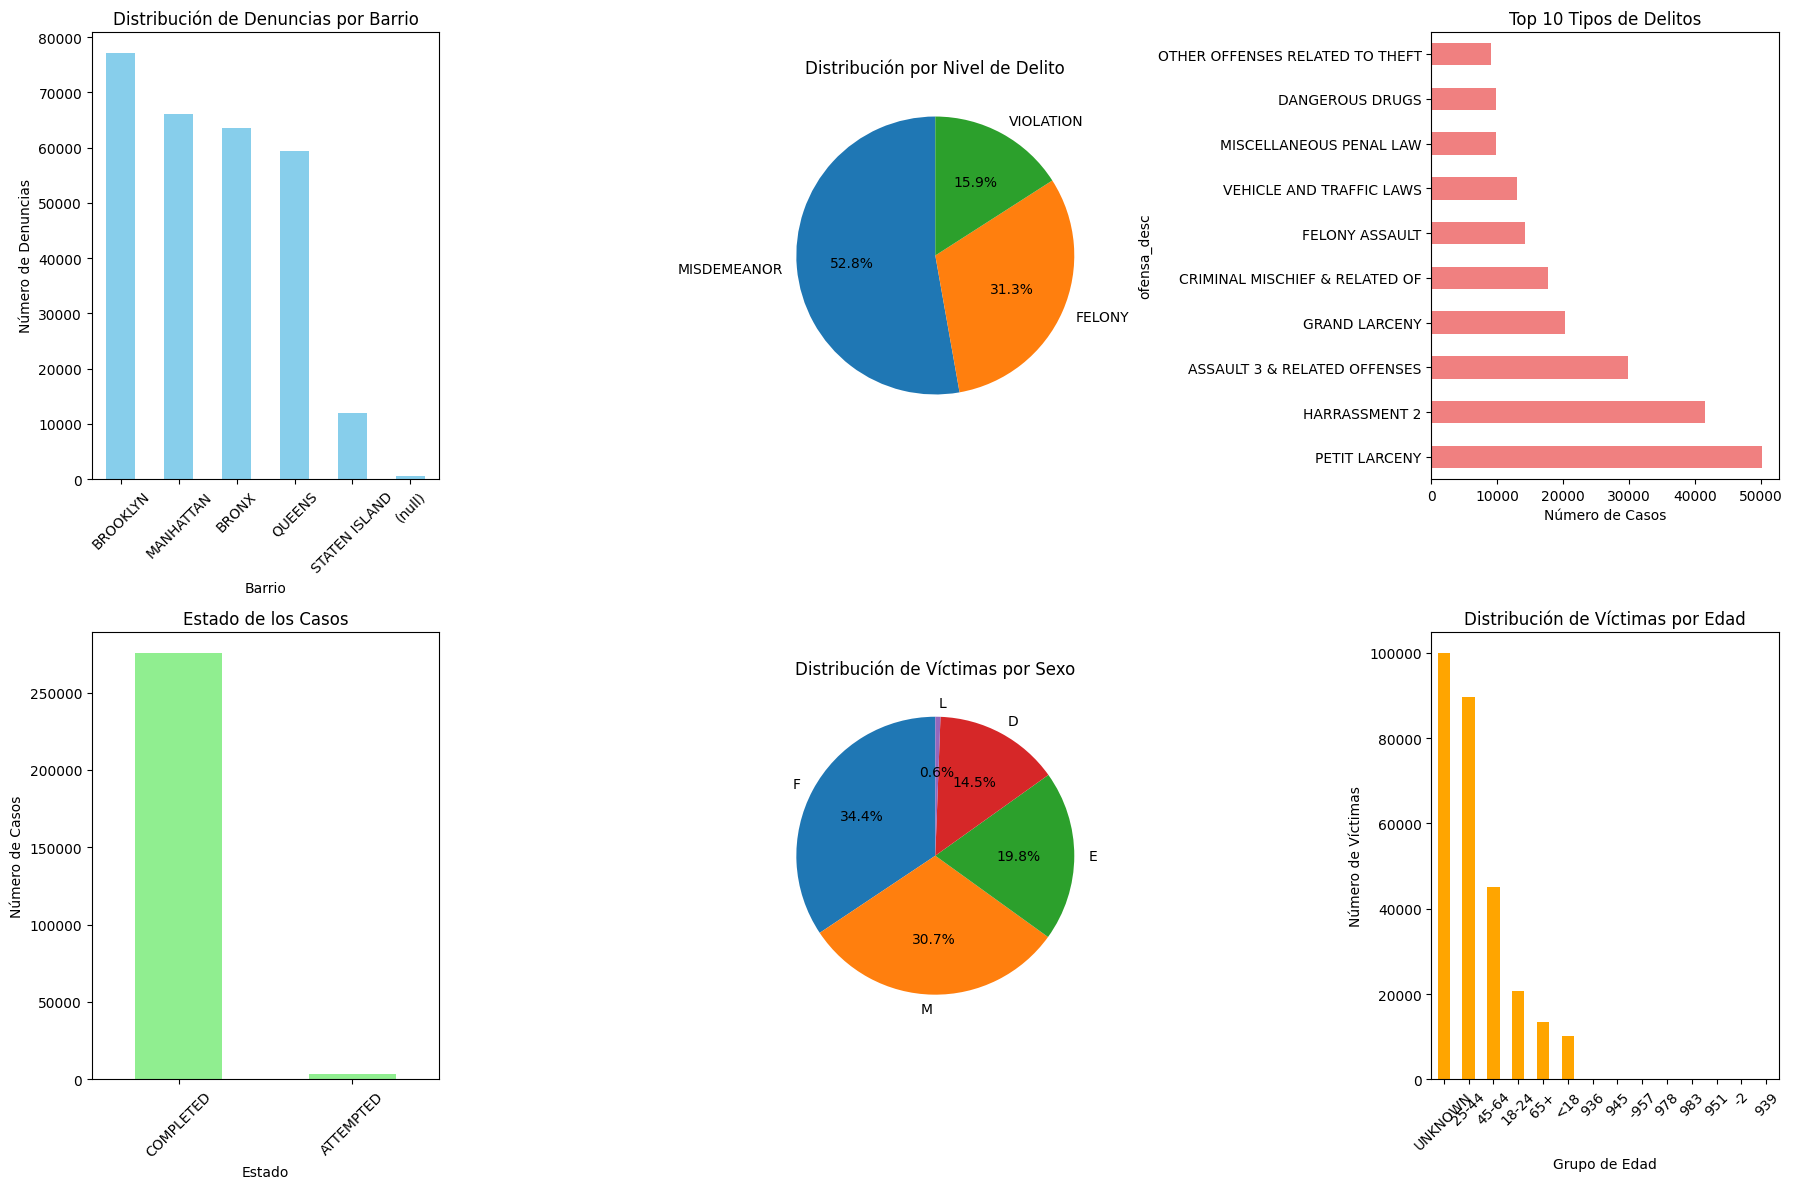

In [13]:
# Gráficos de distribuciones categóricas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribución por barrios
barrios_dist.plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Distribución de Denuncias por Barrio')
axes[0,0].set_xlabel('Barrio')
axes[0,0].set_ylabel('Número de Denuncias')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Niveles de delitos
delitos_nivel.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Distribución por Nivel de Delito')
axes[0,1].set_ylabel('')

# 3. Top 10 tipos de delitos
delitos_tipos.plot(kind='barh', ax=axes[0,2], color='lightcoral')
axes[0,2].set_title('Top 10 Tipos de Delitos')
axes[0,2].set_xlabel('Número de Casos')

# 4. Estado de casos
casos_estado.plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Estado de los Casos')
axes[1,0].set_xlabel('Estado')
axes[1,0].set_ylabel('Número de Casos')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Víctimas por sexo
victimas_sexo.plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Distribución de Víctimas por Sexo')
axes[1,1].set_ylabel('')

# 6. Víctimas por edad
victimas_edad.plot(kind='bar', ax=axes[1,2], color='orange')
axes[1,2].set_title('Distribución de Víctimas por Edad')
axes[1,2].set_xlabel('Grupo de Edad')
axes[1,2].set_ylabel('Número de Víctimas')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Análisis Temporal

Exploramos patrones temporales en las denuncias:


In [14]:
# Análisis temporal
import numpy as np

# Extraer componentes temporales
df_limpio['año'] = df_limpio['fecha_desde'].dt.year
df_limpio['mes'] = df_limpio['fecha_desde'].dt.month
df_limpio['dia_semana'] = df_limpio['fecha_desde'].dt.dayofweek
df_limpio['dia_mes'] = df_limpio['fecha_desde'].dt.day

# Convertir día de la semana a nombres
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
#df_limpio['nombre_dia'] = df_limpio['dia_semana'].map(lambda x: dias_semana[x])
df_limpio['nombre_dia'] = df_limpio['dia_semana'].apply(
    lambda x: dias_semana[int(x)] if pd.notna(x) else np.nan
)

# Análisis de horas (extraer solo la hora de la cadena de tiempo)
def extraer_hora(hora_str):
    if pd.isna(hora_str) or hora_str == '(null)':
        return np.nan
    try:
        return int(hora_str.split(':')[0])
    except:
        return np.nan

df_limpio['hora'] = df_limpio['hora_desde'].apply(extraer_hora)

print("=== DISTRIBUCIÓN TEMPORAL ===")
print(f"Período de datos: {df_limpio['fecha_desde'].min().strftime('%Y-%m-%d')} a {df_limpio['fecha_desde'].max().strftime('%Y-%m-%d')}")
print(f"Meses representados: {sorted(df_limpio['mes'].unique())}")
print(f"Años representados: {sorted(df_limpio['año'].unique())}")

print("\n=== DISTRIBUCIÓN POR DÍA DE LA SEMANA ===")
dia_semana_dist = df_limpio['nombre_dia'].value_counts()[dias_semana]
print(dia_semana_dist)

print("\n=== DISTRIBUCIÓN POR MES ===")
mes_dist = df_limpio['mes'].value_counts().sort_index()
print(mes_dist)

print("\n=== DISTRIBUCIÓN POR HORA DEL DÍA ===")
hora_dist = df_limpio['hora'].value_counts().sort_index()
print(hora_dist.head(10))



=== DISTRIBUCIÓN TEMPORAL ===
Período de datos: 2025-01-01 a 2025-06-30
Meses representados: [1, 2, 3, 4, 5, 6]
Años representados: [2025]

=== DISTRIBUCIÓN POR DÍA DE LA SEMANA ===
nombre_dia
Lunes        37904
Martes       39740
Miércoles    41830
Jueves       40953
Viernes      42394
Sábado       39314
Domingo      36592
Name: count, dtype: int64

=== DISTRIBUCIÓN POR MES ===
mes
1    45755
2    41835
3    48380
4    47951
5    49681
6    45125
Name: count, dtype: int64

=== DISTRIBUCIÓN POR HORA DEL DÍA ===
hora
0    11291
1     8405
2     7185
3     6002
4     5125
5     4001
6     4309
7     6634
8     9614
9    10049
Name: count, dtype: int64


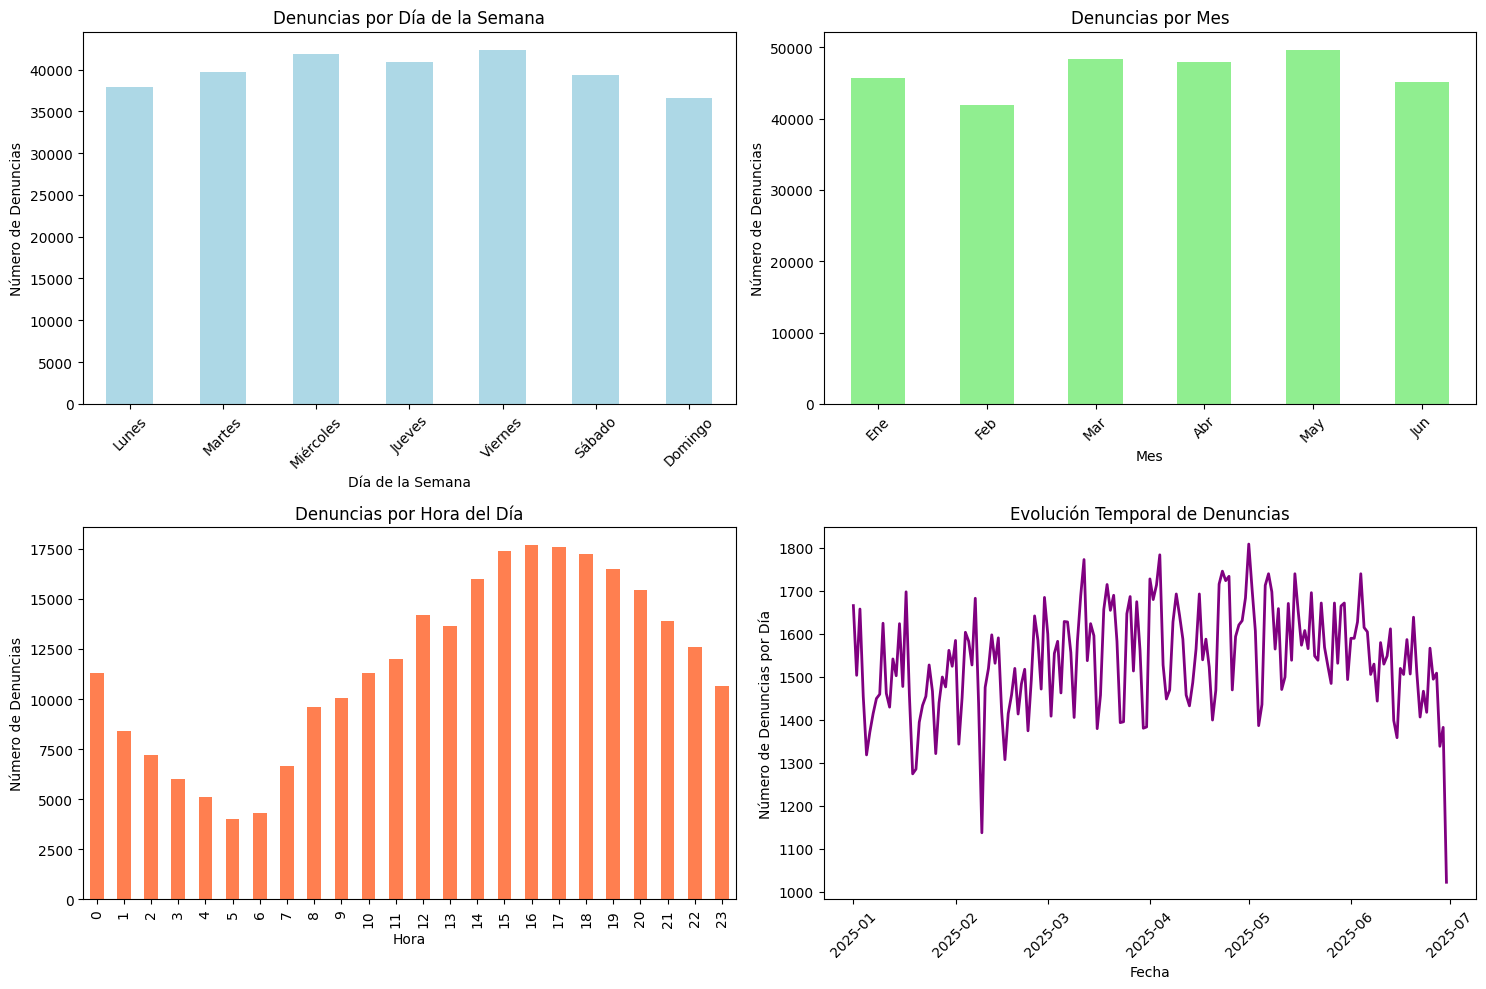

In [15]:
# Gráficos temporales
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribución por día de la semana
dia_semana_dist.plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Denuncias por Día de la Semana')
axes[0,0].set_xlabel('Día de la Semana')
axes[0,0].set_ylabel('Número de Denuncias')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Distribución por mes
mes_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
               'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
mes_dist.plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Denuncias por Mes')
axes[0,1].set_xlabel('Mes')
axes[0,1].set_ylabel('Número de Denuncias')
axes[0,1].set_xticklabels([mes_nombres[i-1] for i in mes_dist.index], rotation=45)

# 3. Distribución por hora del día
hora_dist.plot(kind='bar', ax=axes[1,0], color='coral')
axes[1,0].set_title('Denuncias por Hora del Día')
axes[1,0].set_xlabel('Hora')
axes[1,0].set_ylabel('Número de Denuncias')

# 4. Serie temporal diaria
daily_counts = df_limpio.groupby(df_limpio['fecha_desde'].dt.date).size()
daily_counts.plot(ax=axes[1,1], color='purple', linewidth=2)
axes[1,1].set_title('Evolución Temporal de Denuncias')
axes[1,1].set_xlabel('Fecha')
axes[1,1].set_ylabel('Número de Denuncias por Día')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Análisis Geográfico

Exploramos la distribución espacial de las denuncias usando las coordenadas disponibles:


In [16]:
# Análisis geográfico
print("=== ANÁLISIS GEOGRÁFICO ===")

# Análisis de coordenadas válidas
coords_validas = df_limpio.dropna(subset=['latitude', 'longitude'])
coords_validas = coords_validas[
    (coords_validas['latitude'] != 0.0) & (coords_validas['longitude'] != 0.0)
]
print(f"Registros con coordenadas válidas: {len(coords_validas)} de {len(df_limpio)} ({len(coords_validas)/len(df_limpio)*100:.1f}%)")

if len(coords_validas) > 0:
    print(f"\nRangos de coordenadas:")
    print(f"Latitud: {coords_validas['latitude'].min():.6f} a {coords_validas['latitude'].max():.6f}")
    print(f"Longitud: {coords_validas['longitude'].min():.6f} a {coords_validas['longitude'].max():.6f}")
    
    # Estadísticas por barrio
    print(f"\n=== CONCENTRACIÓN POR BARRIO ===")
    barrio_coords = coords_validas.groupby('barrio').agg({
        'latitude': 'count',
        'longitude': 'mean'
    }).rename(columns={'latitude': 'num_denuncias', 'longitude': 'long_promedio'})
    
    barrio_coords['lat_promedio'] = coords_validas.groupby('barrio')['latitude'].mean()
    barrio_coords = barrio_coords.sort_values('num_denuncias', ascending=False)
    print(barrio_coords)
    
    # Densidad de denuncias por área geográfica
    print(f"\n=== DENSIDAD GEOGRÁFICA ===")
    lat_bins = pd.cut(coords_validas['latitude'], bins=5, labels=['Sur', 'Sur-Centro', 'Centro', 'Norte-Centro', 'Norte'])
    lon_bins = pd.cut(coords_validas['longitude'], bins=5, labels=['Oeste', 'Oeste-Centro', 'Centro', 'Este-Centro', 'Este'])
    
    densidad_geografica = pd.crosstab(lat_bins, lon_bins)
    print("Distribución por cuadrantes geográficos:")
    print(densidad_geografica)
else:
    print("No hay coordenadas válidas para analizar")


=== ANÁLISIS GEOGRÁFICO ===
Registros con coordenadas válidas: 277197 de 278727 (99.5%)

Rangos de coordenadas:
Latitud: 40.499026 a 40.912722
Longitud: -74.254378 a -73.700719

=== CONCENTRACIÓN POR BARRIO ===
               num_denuncias  long_promedio  lat_promedio
barrio                                                   
BROOKLYN               76853     -73.946777     40.658283
MANHATTAN              65612     -73.970969     40.772249
BRONX                  63223     -73.888105     40.844660
QUEENS                 58989     -73.833583     40.715718
STATEN ISLAND          11962     -74.124517     40.604322
(null)                   558     -73.973386     40.764645

=== DENSIDAD GEOGRÁFICA ===
Distribución por cuadrantes geográficos:
longitude     Oeste  Oeste-Centro  Centro  Este-Centro   Este
latitude                                                     
Sur            1983          1074    3337          270      0
Sur-Centro     2068          7179   25489         9519   4129
Centro 

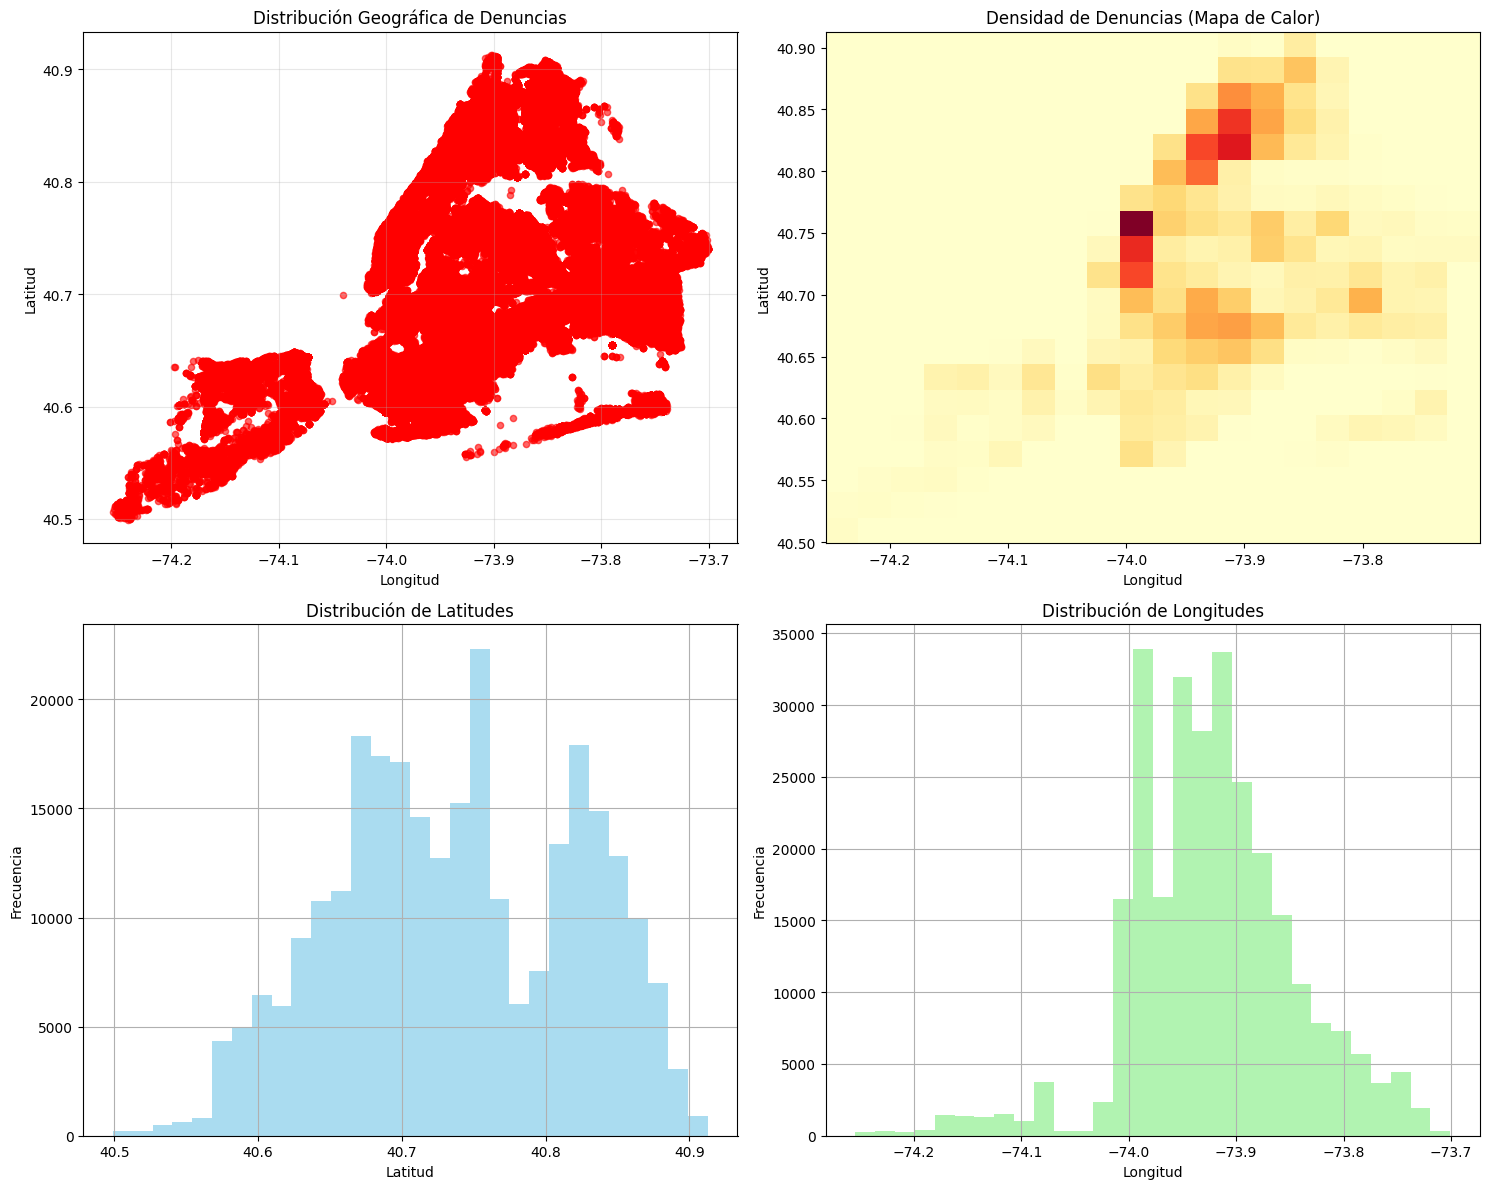

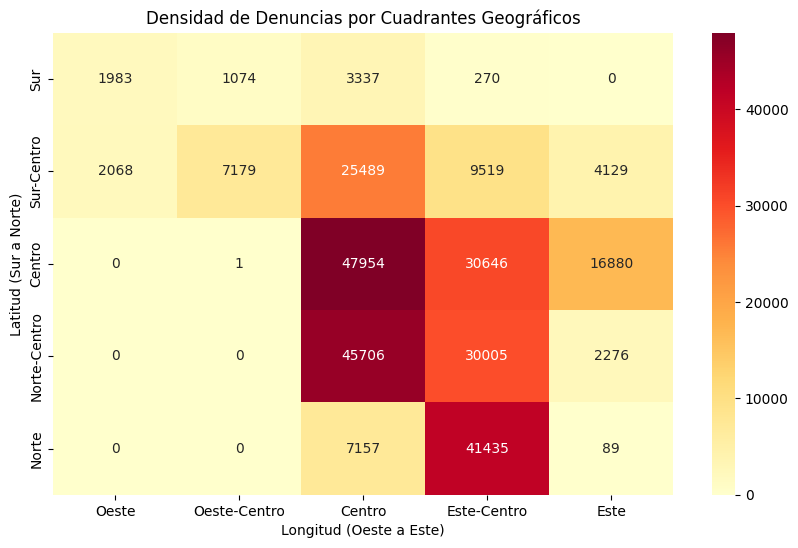

In [17]:
# Gráficos geográficos
if len(coords_validas) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Mapa de dispersión de denuncias
    scatter = axes[0,0].scatter(coords_validas['longitude'], coords_validas['latitude'], 
                               alpha=0.6, s=20, c='red')
    axes[0,0].set_title('Distribución Geográfica de Denuncias')
    axes[0,0].set_xlabel('Longitud')
    axes[0,0].set_ylabel('Latitud')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Histograma 2D (mapa de calor geográfico)
    axes[0,1].hist2d(coords_validas['longitude'], coords_validas['latitude'], 
                     bins=20, cmap='YlOrRd')
    axes[0,1].set_title('Densidad de Denuncias (Mapa de Calor)')
    axes[0,1].set_xlabel('Longitud')
    axes[0,1].set_ylabel('Latitud')
    
    # 3. Distribución de latitudes
    coords_validas['latitude'].hist(bins=30, ax=axes[1,0], color='skyblue', alpha=0.7)
    axes[1,0].set_title('Distribución de Latitudes')
    axes[1,0].set_xlabel('Latitud')
    axes[1,0].set_ylabel('Frecuencia')
    
    # 4. Distribución de longitudes
    coords_validas['longitude'].hist(bins=30, ax=axes[1,1], color='lightgreen', alpha=0.7)
    axes[1,1].set_title('Distribución de Longitudes')
    axes[1,1].set_xlabel('Longitud')
    axes[1,1].set_ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()
    
    # Gráfico adicional: Mapa de calor de densidad por cuadrantes
    if 'densidad_geografica' in locals():
        plt.figure(figsize=(10, 6))
        sns.heatmap(densidad_geografica, annot=True, cmap='YlOrRd', fmt='d')
        plt.title('Densidad de Denuncias por Cuadrantes Geográficos')
        plt.ylabel('Latitud (Sur a Norte)')
        plt.xlabel('Longitud (Oeste a Este)')
        plt.show()
else:
    print("No se pueden generar gráficos geográficos sin coordenadas válidas")


### Análisis de Relaciones entre Variables

Exploramos relaciones interesantes entre diferentes variables:


In [18]:
# Análisis de relaciones entre variables
print("=== RELACIÓN ENTRE TIPO DE DELITO Y BARRIO ===")
# Top delitos por barrio
delito_barrio = pd.crosstab(df_limpio['barrio'], df_limpio['ofensa_desc'])
top_delitos_por_barrio = delito_barrio.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)
for barrio, delitos in top_delitos_por_barrio.items():
    print(f"{barrio}: {delitos[:3]}")

print("\n=== RELACIÓN ENTRE HORA Y TIPO DE DELITO ===")
# Analizar los delitos más frecuentes por franja horaria
if df_limpio['hora'].notna().any():
    # Definir franjas horarias
    def definir_franja(hora):
        if pd.isna(hora):
            return 'Desconocida'
        elif 6 <= hora < 12:
            return 'Mañana'
        elif 12 <= hora < 18:
            return 'Tarde'
        elif 18 <= hora < 24:
            return 'Noche'
        else:
            return 'Madrugada'
    
    df_limpio['franja_horaria'] = df_limpio['hora'].apply(definir_franja)
    
    franja_delito = pd.crosstab(df_limpio['franja_horaria'], df_limpio['ofensa_desc'])
    top_delitos_por_franja = franja_delito.apply(lambda x: x.nlargest(2).index.tolist() if x.sum() > 0 else [], axis=1)
    
    for franja, delitos in top_delitos_por_franja.items():
        if delitos:
            print(f"{franja}: {delitos}")

print("\n=== RELACIÓN ENTRE SEXO DE VÍCTIMA Y TIPO DE DELITO ===")
sexo_delito = pd.crosstab(df_limpio['victima_sexo'], df_limpio['ofensa_desc'])
print("Top 3 delitos por sexo de víctima:")
for sexo in sexo_delito.index:
    if sexo not in ['<NA>', '(null)']:
        top_delitos = sexo_delito.loc[sexo].nlargest(3)
        print(f"{sexo}: {list(top_delitos.index)}")

print("\n=== ANÁLISIS DE DURACIONES DE INCIDENTES ===")
# Calcular duración cuando hay fecha de inicio y fin
df_con_duracion = df_limpio.dropna(subset=['fecha_desde', 'fecha_hasta']).copy()

if len(df_con_duracion) > 0:
    df_con_duracion['duracion_dias'] = (df_con_duracion['fecha_hasta'] - df_con_duracion['fecha_desde']).dt.days
    print(f"Incidentes con duración calculable: {len(df_con_duracion)}")
    print(f"Duración promedio: {df_con_duracion['duracion_dias'].mean():.2f} días")
    print(f"Duración mediana: {df_con_duracion['duracion_dias'].median():.2f} días")
    print(f"Duración máxima: {df_con_duracion['duracion_dias'].max()} días")
else:
    print("No hay suficientes datos para calcular duraciones")


=== RELACIÓN ENTRE TIPO DE DELITO Y BARRIO ===
(null): ['PETIT LARCENY', 'FELONY ASSAULT', 'VEHICLE AND TRAFFIC LAWS']
BRONX: ['HARRASSMENT 2', 'PETIT LARCENY', 'ASSAULT 3 & RELATED OFFENSES']
BROOKLYN: ['PETIT LARCENY', 'HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES']
MANHATTAN: ['PETIT LARCENY', 'HARRASSMENT 2', 'GRAND LARCENY']
QUEENS: ['PETIT LARCENY', 'HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES']
STATEN ISLAND: ['HARRASSMENT 2', 'PETIT LARCENY', 'ASSAULT 3 & RELATED OFFENSES']

=== RELACIÓN ENTRE HORA Y TIPO DE DELITO ===
Madrugada: ['ASSAULT 3 & RELATED OFFENSES', 'HARRASSMENT 2']
Mañana: ['PETIT LARCENY', 'HARRASSMENT 2']
Noche: ['PETIT LARCENY', 'HARRASSMENT 2']
Tarde: ['PETIT LARCENY', 'HARRASSMENT 2']

=== RELACIÓN ENTRE SEXO DE VÍCTIMA Y TIPO DE DELITO ===
Top 3 delitos por sexo de víctima:
D: ['PETIT LARCENY', 'CRIMINAL MISCHIEF & RELATED OF', 'OTHER OFFENSES RELATED TO THEFT']
E: ['VEHICLE AND TRAFFIC LAWS', 'DANGEROUS DRUGS', 'OTHER OFFENSES RELATED TO THEFT']
F: ['HAR

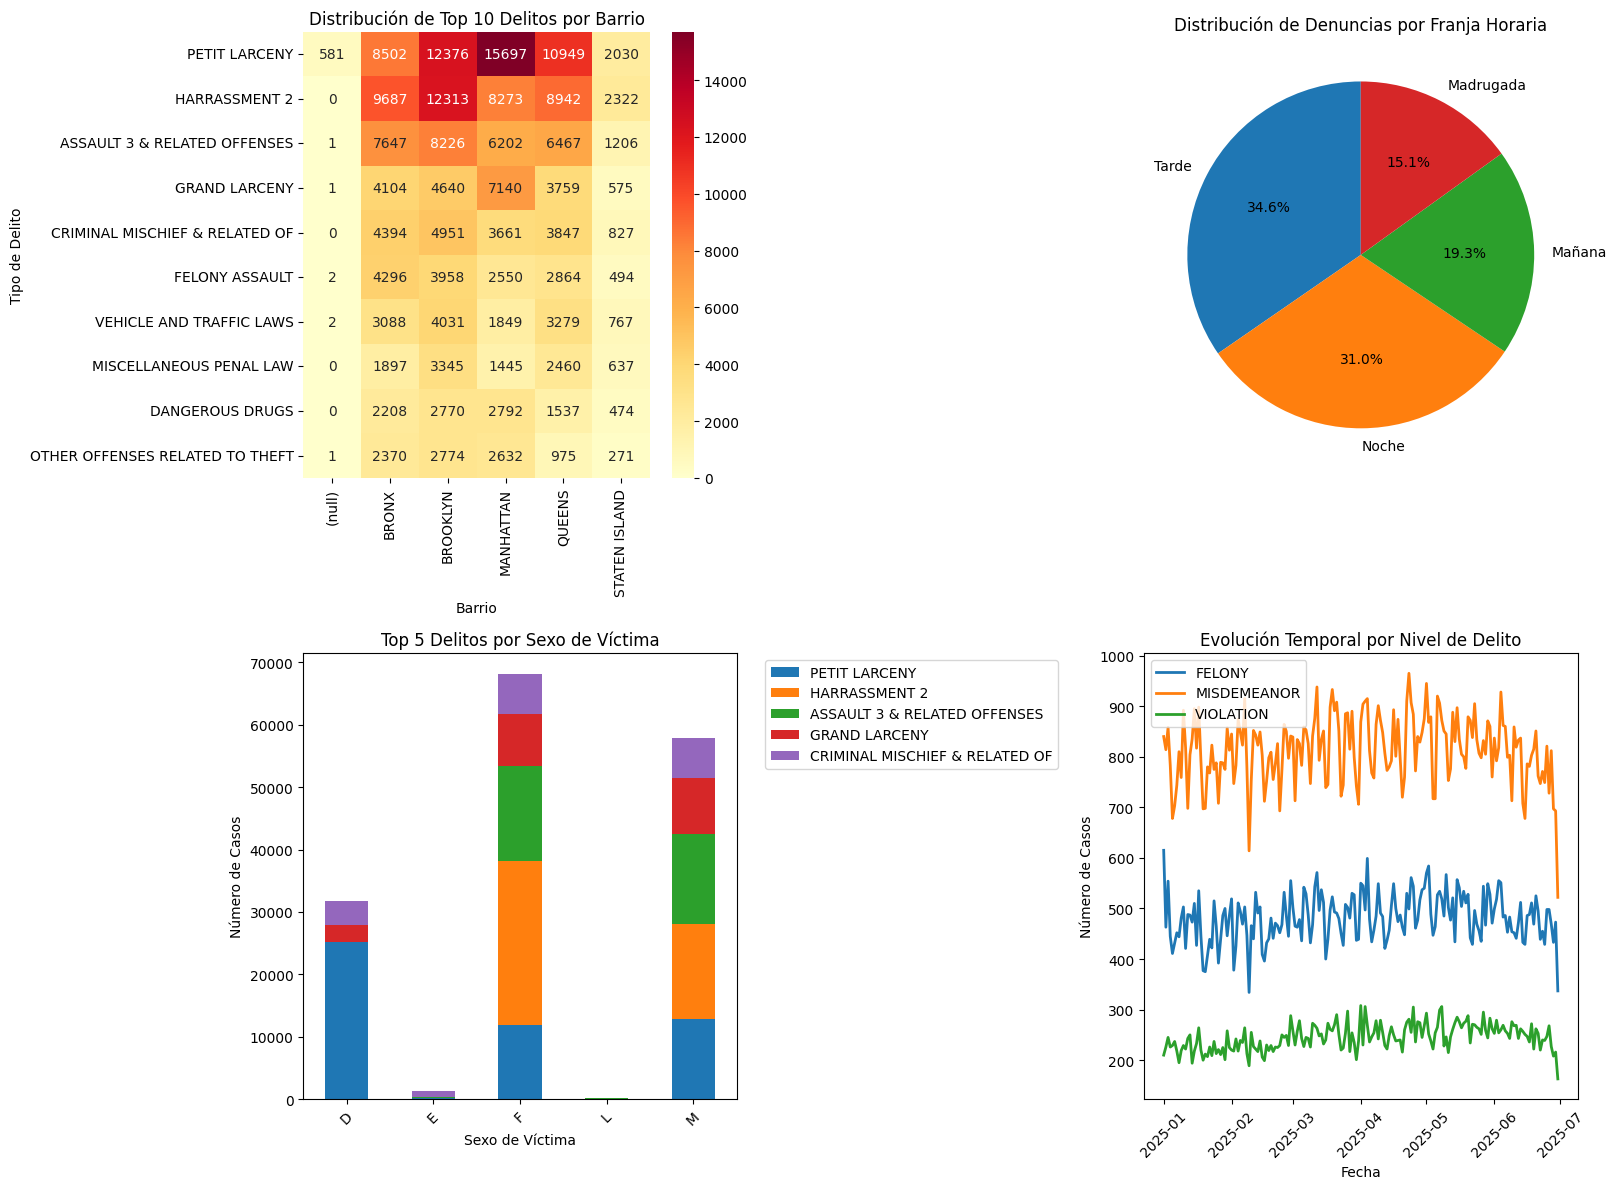

In [19]:
# Gráficos de relaciones entre variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Heatmap de delitos por barrio (top 10 delitos)
top_10_delitos = df_limpio['ofensa_desc'].value_counts().head(10).index
delito_barrio_filtered = pd.crosstab(df_limpio['barrio'], df_limpio['ofensa_desc'])[top_10_delitos]

sns.heatmap(delito_barrio_filtered.T, annot=True, fmt='d', ax=axes[0,0], cmap='YlOrRd')
axes[0,0].set_title('Distribución de Top 10 Delitos por Barrio')
axes[0,0].set_xlabel('Barrio')
axes[0,0].set_ylabel('Tipo de Delito')

# Distribución por franja horaria
if 'franja_horaria' in df_limpio.columns:
    franja_counts = df_limpio['franja_horaria'].value_counts()
    franja_counts.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', startangle=90)
    axes[0,1].set_title('Distribución de Denuncias por Franja Horaria')
    axes[0,1].set_ylabel('')

# Delitos por sexo de víctima
sexo_delito_top = pd.crosstab(df_limpio['victima_sexo'], df_limpio['ofensa_desc'])
# Filtrar solo las columnas de los delitos más frecuentes
top_5_delitos = df_limpio['ofensa_desc'].value_counts().head(5).index
sexo_delito_filtered = sexo_delito_top[top_5_delitos]

sexo_delito_filtered.plot(kind='bar', ax=axes[1,0], stacked=True)
axes[1,0].set_title('Top 5 Delitos por Sexo de Víctima')
axes[1,0].set_xlabel('Sexo de Víctima')
axes[1,0].set_ylabel('Número de Casos')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Evolución temporal por nivel de delito
nivel_temporal = pd.crosstab(df_limpio['fecha_desde'].dt.date, df_limpio['ofensa_nivel'])
nivel_temporal.plot(ax=axes[1,1], linewidth=2)
axes[1,1].set_title('Evolución Temporal por Nivel de Delito')
axes[1,1].set_xlabel('Fecha')
axes[1,1].set_ylabel('Número de Casos')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend()

plt.tight_layout()
plt.show()


### Análisis de FALTANTES

Exploramos relaciones interesantes entre diferentes variables:

In [20]:
# Identificación de datos faltantes
df_limpio.isna().sum()  

distrito                         0
barrio                           0
fecha_desde                      0
hora_desde                       0
fecha_hasta                  12777
hora_hasta                       0
atentado_completado              0
vivienda_publica                 0
juridisccion_cod                 0
juridisccion_desc                0
ofensa_clasif_cod                0
ofensa_nivel                     0
ofensa_lugar                     0
ofensa_desc                      0
barrio_zona                      0
ofensa_clasif_cod_mas_det      136
ofensa_desc_mas_det              0
lugar_desc                       0
fecha_reporte                    0
sospechoso_edad_grupo            0
sospechoso_raza                  0
sospechoso_sexo                  0
victima_edad_grupo               0
victima_raza                     0
victima_sexo                     0
latitude                         0
longitude                        0
anio_mes                         0
año                 

In [21]:
# Calcular la proporción de valores nulos en cada columna
df_limpio.isna().mean().round(4)*100

distrito                     0.00
barrio                       0.00
fecha_desde                  0.00
hora_desde                   0.00
fecha_hasta                  4.58
hora_hasta                   0.00
atentado_completado          0.00
vivienda_publica             0.00
juridisccion_cod             0.00
juridisccion_desc            0.00
ofensa_clasif_cod            0.00
ofensa_nivel                 0.00
ofensa_lugar                 0.00
ofensa_desc                  0.00
barrio_zona                  0.00
ofensa_clasif_cod_mas_det    0.05
ofensa_desc_mas_det          0.00
lugar_desc                   0.00
fecha_reporte                0.00
sospechoso_edad_grupo        0.00
sospechoso_raza              0.00
sospechoso_sexo              0.00
victima_edad_grupo           0.00
victima_raza                 0.00
victima_sexo                 0.00
latitude                     0.00
longitude                    0.00
anio_mes                     0.00
año                          0.00
mes           

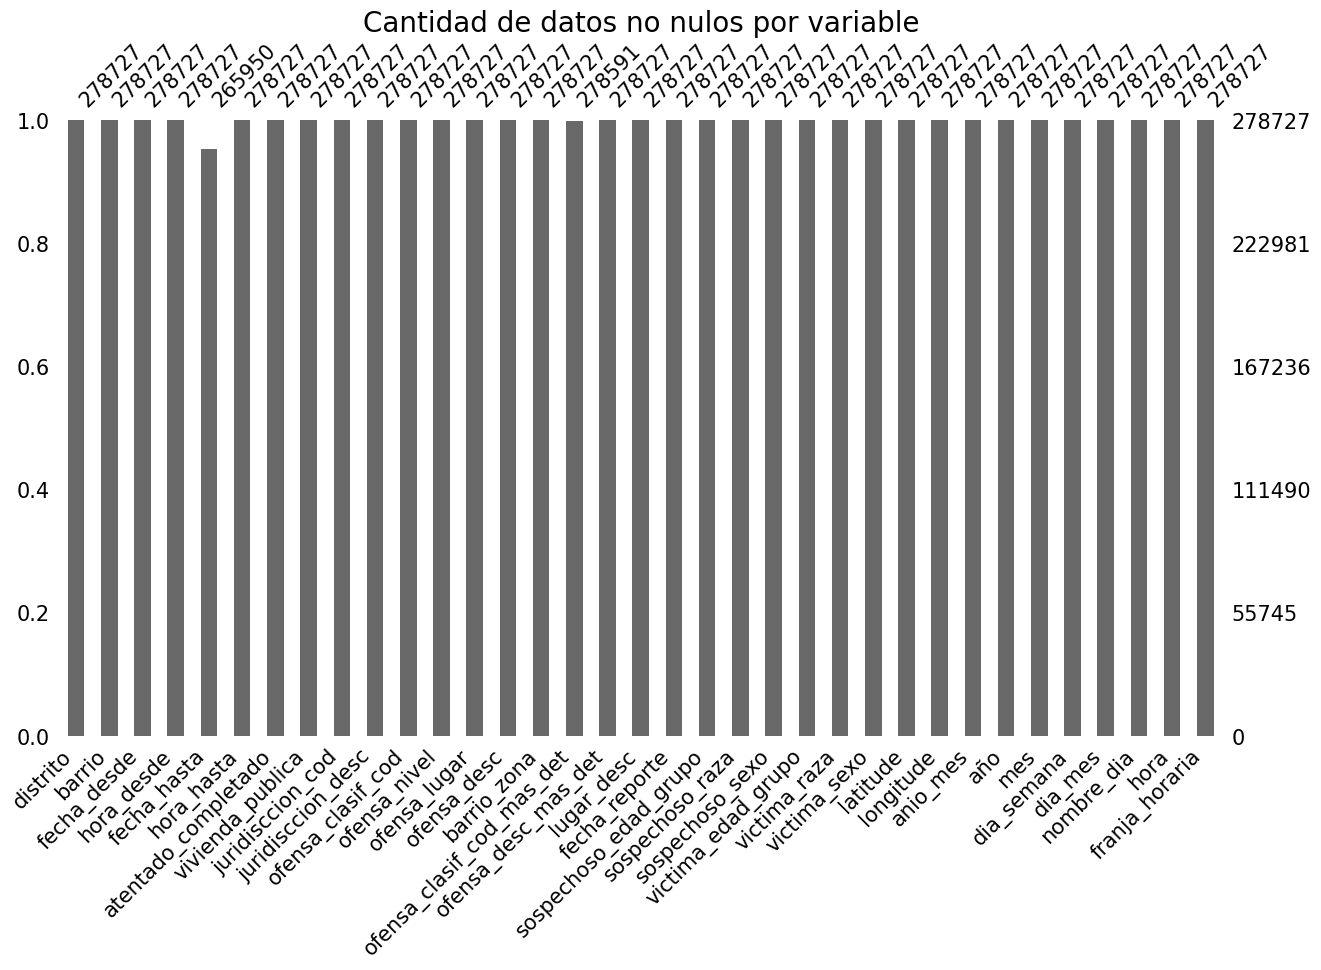

In [22]:
#Visualización con biblioteca Missingno
msno.bar(df_limpio, fontsize=15, figsize=(15,8))
plt.title("Cantidad de datos no nulos por variable", fontsize=20)
plt.show()

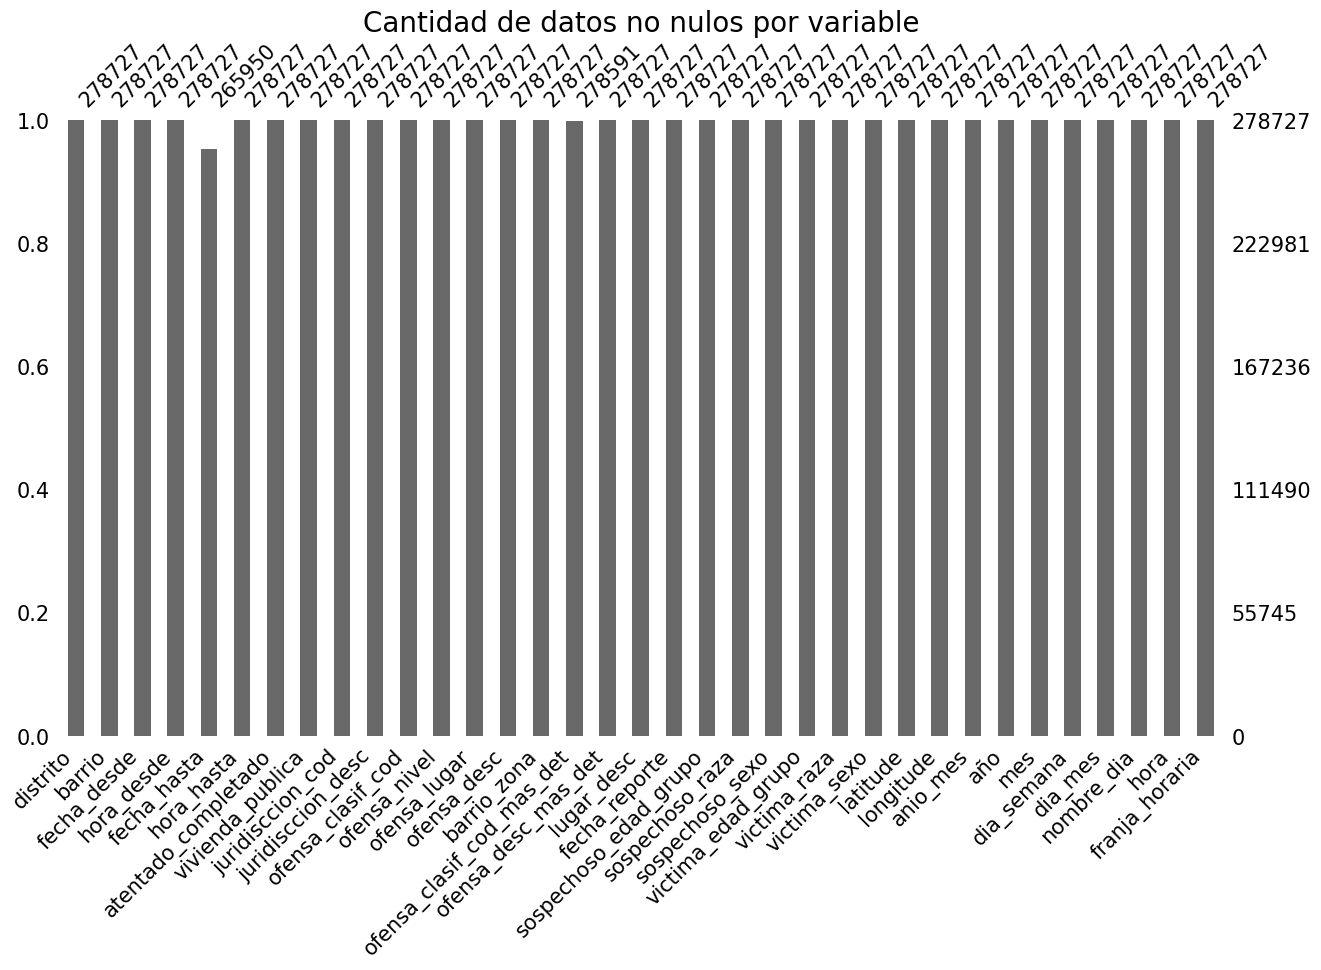

In [23]:
#Visualización con biblioteca Missingno
msno.bar(df_limpio, fontsize=15, figsize=(15,8))
plt.title("Cantidad de datos no nulos por variable", fontsize=20)
plt.show()

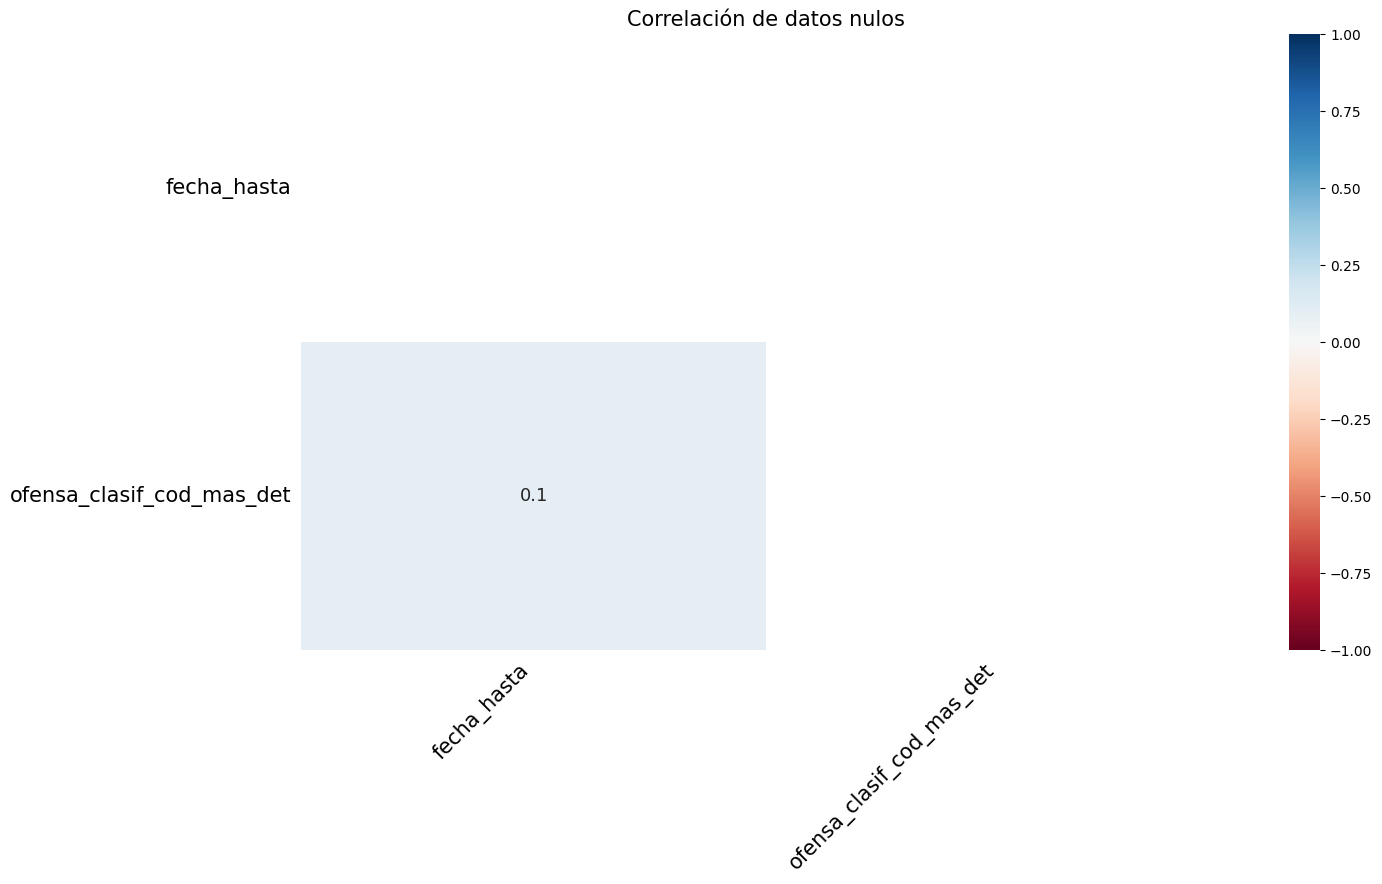

In [24]:
msno.heatmap(df_limpio, fontsize=15, figsize=(15,8))
plt.title("Correlación de datos nulos", fontsize=15)
plt.show()

#### Análisis de las causas de los datos faltantes
* En el caso de `fecha_hasta`, el valor faltante probablemente se deba a que la información nunca fue actualizada en el sistema. Es decir, el incidente puede haberse cerrado en la práctica, pero no se cargó esa fecha. Esta ausencia **no parece depender de otras variables observadas** ni del valor mismo, por lo que **no puede descartarse que sea MAR** (ya que puede depender de características como el tipo de delito o distrito, que no fueron exploradas a fondo). También podría tratarse de **errores administrativos aleatorios**, lo que la acercaría a **MCAR**.

* En cuanto a `ofensa_clasif_cod_mas_det`, el porcentaje de valores faltantes es extremadamente bajo. No se detectó relación con otras variables ni un patrón evidente, por lo tanto, puede clasificarse como **MCAR**.

## Conclusiones Principales del Análisis

### **Características Generales del Dataset**
- **Volumen**: 278.727 registros de denuncias policiales de NYC con 27 variables relevantes
- **Período**: Los datos abarcan múltiples meses de 2025 (dataset reciente)
- **Completitud**: Análisis de valores faltantes revela patrones específicos en ciertos campos

### **Distribución Geográfica**
- **Concentración por Barrios**: Algunos barrios muestran mayor concentración de denuncias
- **Coordenadas**: Disponibilidad de datos geográficos permite análisis espacial detallado
- **Patrones Espaciales**: Se observan clusters geográficos de actividad delictiva

### **Patrones Temporales**
- **Estacionalidad**: Variaciones en la cantidad de denuncias por mes
- **Días de la Semana**: Distribución no uniforme a lo largo de la semana
- **Franjas Horarias**: Ciertos horarios muestran mayor actividad delictiva
- **Tendencias**: Evolución temporal permite identificar picos y valles

### **Tipos de Delitos**
- **Predominancia**: Ciertos tipos de delitos son significativamente más frecuentes
- **Nivel de Gravedad**: Distribución entre delitos menores, mayores y faltas
- **Variabilidad**: Amplia gama de tipos de delitos registrados

### **Perfil de Víctimas**
- **Demografía**: Patrones en edad, sexo y raza de las víctimas
- **Relaciones**: Conexiones entre tipo de delito y características de las víctimas
- **Representación**: Algunos grupos demográficos aparecen más frecuentemente

### **Relaciones Clave Identificadas**
- **Ubicación-Delito**: Ciertos tipos de delitos se concentran en barrios específicos
- **Tiempo-Delito**: Algunos delitos muestran patrones horarios característicos
- **Víctima-Delito**: Relaciones entre características de víctimas y tipos de delitos


### 3. Consignas
Plantear un posible problema de ML supervisado a partir de los datos elegidos.

- Describir el problema de clasifi cación o de regresión.
- Definir la variable target.

### Clasificación Multiclase Supervisada
Definimos el problema como una tarea de clasificación supervisada con cinco clases, donde el objetivo es predecir el barrio donde ocurrirá el próximo delito.

#### Definición
* Tipo: Clasificación supervisada (5 clases).
* Target: Barrio → {Manhattan, Brooklyn, Queens, Bronx, Staten Island}.
* Objetivo: Predecir la ubicación geográfica de futuros delitos.

#### Features Principales
* Temporales: hora_del_día, día semana, mes.
* Delito: tipo delito, nivel gravedad, lugar ocurrencia.
* Contextuales: perfil víctima, tipo lugar.
* Históricas: delitos previos zona, tendencia temporal.
* Aplicación Práctica
* Policía Predictiva: Asignación eficiente de patrullas y recursos.
* Mapas de Riesgo: Visualización dinámica de zonas de alta probabilidad.
* Recursos Dinámicos: Redistribución según horarios y días.